In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import trange, tqdm
tqdm.pandas()

In [22]:
pd.read_csv('../data/working_dir/gpt/metrics/markup_preprocessed_with_metrics_0.0.csv')

,aspect,review,answers,gpt_markup,gpt_markup_preprocessed,concat_full_bertscore,concat_full_chrf,concat_full_rouge,concat_full_bleu,concat_precision_bert_score,concat_recall_bert_score,concat_f1_bert_score,concat_score_chrf,concat_rouge1,concat_rouge2,concat_rougeL,concat_rougeLsum,concat_bleu,concat_brevity_penalty_bleu
0,описание личности персонажей,"По-настоящему живой фильм, держит все свои 118...",{'затронуты как личностный аспект человека и е...,NaN,{'-'},"{'precision': [0.6477903127670288], 'recall': ...","{'score': 0.0, 'char_order': 6, 'word_order': ...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.0, 'precisions': [0.0, 0.0, 0.0, 0....",0.647790,0.524984,0.579957,0.000000,0.0,0.0,0.0,0.0,0.000000,3.354626e-04
1,описание игры актёров,Мстители стал первым экспериментом по сбор...,"{'Собственно сам сбор персонажей, и то какие м...","* Описание игры актёров, мнение об актёре или ...",{'-'},"{'precision': [0.6462118029594421], 'recall': ...","{'score': 0.0, 'char_order': 6, 'word_order': ...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.0, 'precisions': [0.0, 0.0, 0.0, 0....",0.646212,0.479831,0.550730,0.000000,0.0,0.0,0.0,0.0,0.000000,3.139133e-17
2,описание декораций и графики,"Два взгляда столкнулись на море, Чтоб станц...",{'-'},NaN,{'-'},"{'precision': [1.0], 'recall': [1.0], 'f1': [1...","{'score': 100.0, 'char_order': 6, 'word_order'...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.0, 'precisions': [1.0, 0.0, 0.0, 0....",1.000000,1.000000,1.000000,100.000000,0.0,0.0,0.0,0.0,0.000000,1.000000e+00
3,описание игры актёров,"Жена главного героя, собственно Джона Уика, уш...","{'Микаэл Нюквист , недавно ворвавшийся в Голл...",В каждом актёре угадывается свой неповторимый ...,{'Эдрианн Палики приковывает к себе внимание г...,"{'precision': [0.8592270612716675], 'recall': ...","{'score': 75.93176214309254, 'char_order': 6, ...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.5999247677338364, 'precisions': [0....",0.859227,0.852421,0.855810,75.931762,0.0,0.0,0.0,0.0,0.599925,9.226920e-01
4,описание игры актёров,'Мумия' - фантастическая комедийная история о ...,"{'Есть еще нимало незаурядных личностей, котор...","* В роли Эвелин выступила актриса Рейчел Вайс,...",{'В роли её неугомонного брата выступил Джонн ...,"{'precision': [0.5732011795043945], 'recall': ...","{'score': 23.32282773956736, 'char_order': 6, ...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.0, 'precisions': [0.058333333333333...",0.573201,0.698894,0.629838,23.322828,0.0,0.0,0.0,0.0,0.000000,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,характеристика внешности персонажей,Как много в кинематографе переоцененных фильмо...,{'-'},NaN,{'-'},"{'precision': [1.0], 'recall': [1.0], 'f1': [1...","{'score': 100.0, 'char_order': 6, 'word_order'...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.0, 'precisions': [1.0, 0.0, 0.0, 0....",1.000000,1.000000,1.000000,100.000000,0.0,0.0,0.0,0.0,0.000000,1.000000e+00
95,описание эмоций от просмотра фильма,Как много в кинематографе переоцененных фильмо...,"{'Лично я не растрогалась, глядя на людей. Рас...",*None*,{'-'},"{'precision': [0.659023642539978], 'recall': [...","{'score': 0.0, 'char_order': 6, 'word_order': ...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.0, 'precisions': [0.0, 0.0, 0.0, 0....",0.659024,0.463165,0.544002,0.000000,0.0,0.0,0.0,0.0,0.000000,1.299581e-24
96,описание декораций и графики,Как много в кинематографе переоцененных фильмо...,{'-'},NaN,{'-'},"{'precision': [1.0], 'recall': [1.0], 'f1': [1...","{'score': 100.0, 'char_order': 6, 'word_order'...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.0, 'precisions': [1.0, 0.0, 0.0, 0....",1.000000,1.000000,1.000000,100.000000,0.0,0.0,0.0,0.0,0.000000,1.000000e+00
97,философские рассуждения,Как много в кинематографе переоцененных фильмо...,{'-'},В рецензии встречаю

In [26]:
markups = []

temperatures = list(np.arange(0, 1.01, 0.05).round(2))

markup_files = [f'../data/working_dir/gpt/metrics/markup_preprocessed_with_metrics_{t}.csv' for t in temperatures]

markup_names = [f'temp={t}' for t in temperatures]

for markup_file in markup_files:
    markups.append(pd.read_csv(markup_file))

print(markups[-1].shape)
markups[0]

(99, 19)


,aspect,review,answers,gpt_markup,gpt_markup_preprocessed,concat_full_bertscore,concat_full_chrf,concat_full_rouge,concat_full_bleu,concat_precision_bert_score,concat_recall_bert_score,concat_f1_bert_score,concat_score_chrf,concat_rouge1,concat_rouge2,concat_rougeL,concat_rougeLsum,concat_bleu,concat_brevity_penalty_bleu
0,описание личности персонажей,"По-настоящему живой фильм, держит все свои 118...",{'затронуты как личностный аспект человека и е...,NaN,{'-'},"{'precision': [0.6477903127670288], 'recall': ...","{'score': 0.0, 'char_order': 6, 'word_order': ...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.0, 'precisions': [0.0, 0.0, 0.0, 0....",0.647790,0.524984,0.579957,0.000000,0.0,0.0,0.0,0.0,0.000000,3.354626e-04
1,описание игры актёров,Мстители стал первым экспериментом по сбор...,"{'Собственно сам сбор персонажей, и то какие м...","* Описание игры актёров, мнение об актёре или ...",{'-'},"{'precision': [0.6462118029594421], 'recall': ...","{'score': 0.0, 'char_order': 6, 'word_order': ...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.0, 'precisions': [0.0, 0.0, 0.0, 0....",0.646212,0.479831,0.550730,0.000000,0.0,0.0,0.0,0.0,0.000000,3.139133e-17
2,описание декораций и графики,"Два взгляда столкнулись на море, Чтоб станц...",{'-'},NaN,{'-'},"{'precision': [1.0], 'recall': [1.0], 'f1': [1...","{'score': 100.0, 'char_order': 6, 'word_order'...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.0, 'precisions': [1.0, 0.0, 0.0, 0....",1.000000,1.000000,1.000000,100.000000,0.0,0.0,0.0,0.0,0.000000,1.000000e+00
3,описание игры актёров,"Жена главного героя, собственно Джона Уика, уш...","{'Микаэл Нюквист , недавно ворвавшийся в Голл...",В каждом актёре угадывается свой неповторимый ...,{'Эдрианн Палики приковывает к себе внимание г...,"{'precision': [0.8592270612716675], 'recall': ...","{'score': 75.93176214309254, 'char_order': 6, ...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.5999247677338364, 'precisions': [0....",0.859227,0.852421,0.855810,75.931762,0.0,0.0,0.0,0.0,0.599925,9.226920e-01
4,описание игры актёров,'Мумия' - фантастическая комедийная история о ...,"{'Есть еще нимало незаурядных личностей, котор...","* В роли Эвелин выступила актриса Рейчел Вайс,...",{'В роли её неугомонного брата выступил Джонн ...,"{'precision': [0.5732011795043945], 'recall': ...","{'score': 23.32282773956736, 'char_order': 6, ...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.0, 'precisions': [0.058333333333333...",0.573201,0.698894,0.629838,23.322828,0.0,0.0,0.0,0.0,0.000000,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,характеристика внешности персонажей,Как много в кинематографе переоцененных фильмо...,{'-'},NaN,{'-'},"{'precision': [1.0], 'recall': [1.0], 'f1': [1...","{'score': 100.0, 'char_order': 6, 'word_order'...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.0, 'precisions': [1.0, 0.0, 0.0, 0....",1.000000,1.000000,1.000000,100.000000,0.0,0.0,0.0,0.0,0.000000,1.000000e+00
95,описание эмоций от просмотра фильма,Как много в кинематографе переоцененных фильмо...,"{'Лично я не растрогалась, глядя на людей. Рас...",*None*,{'-'},"{'precision': [0.659023642539978], 'recall': [...","{'score': 0.0, 'char_order': 6, 'word_order': ...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.0, 'precisions': [0.0, 0.0, 0.0, 0....",0.659024,0.463165,0.544002,0.000000,0.0,0.0,0.0,0.0,0.000000,1.299581e-24
96,описание декораций и графики,Как много в кинематографе переоцененных фильмо...,{'-'},NaN,{'-'},"{'precision': [1.0], 'recall': [1.0], 'f1': [1...","{'score': 100.0, 'char_order': 6, 'word_order'...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.0, 'precisions': [1.0, 0.0, 0.0, 0....",1.000000,1.000000,1.000000,100.000000,0.0,0.0,0.0,0.0,0.000000,1.000000e+00
97,философские рассуждения,Как много в кинематографе переоцененных фильмо...,{'-'},В рецензии встречаю



MEAN:
temp=0.0: 0.7474900995842134
temp=0.05: 0.729376130633884
temp=0.1: 0.7353968605248615
temp=0.15: 0.7273952539521035
temp=0.2: 0.734337537577658
temp=0.25: 0.7447330813215236
temp=0.3: 0.7287243881610909
temp=0.35: 0.7520204559721128
temp=0.4: 0.7504356930954288
temp=0.45: 0.7540065483613447
temp=0.5: 0.7489011356926928
temp=0.55: 0.7510541800898735
temp=0.6: 0.7385624162476472
temp=0.65: 0.7447077090089972
temp=0.7: 0.7323054319078272
temp=0.75: 0.7438021100530721
temp=0.8: 0.7579151572603168
temp=0.85: 0.7391556191323984
temp=0.9: 0.7350986289857614
temp=0.95: 0.7343682044684284
temp=1.0: 0.7434936457812183


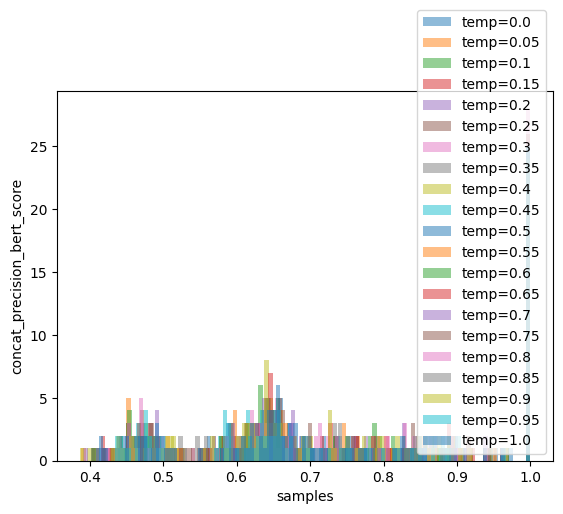



MEAN:
temp=0.0: 0.7771812270988118
temp=0.05: 0.7628381366681571
temp=0.1: 0.771114714518942
temp=0.15: 0.7557172218356469
temp=0.2: 0.7660324194214561
temp=0.25: 0.781914717922307
temp=0.3: 0.7651509513156582
temp=0.35: 0.7837281049502016
temp=0.4: 0.7810079109187078
temp=0.45: 0.7790005468960964
temp=0.5: 0.7751015927454438
temp=0.55: 0.7687377613602262
temp=0.6: 0.76528486278322
temp=0.65: 0.7684279975264964
temp=0.7: 0.761649466825254
temp=0.75: 0.7534247022686582
temp=0.8: 0.7826633239635313
temp=0.85: 0.765403189141341
temp=0.9: 0.7562748311143933
temp=0.95: 0.7643574747172269
temp=1.0: 0.762152890364329


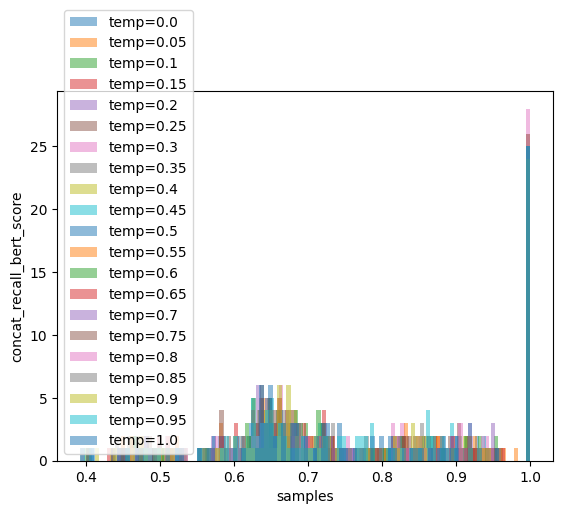



MEAN:
temp=0.0: 0.7572286983933112
temp=0.05: 0.7400263261915457
temp=0.1: 0.7477662993801965
temp=0.15: 0.7356026235854987
temp=0.2: 0.7438738803670863
temp=0.25: 0.7577707574825094
temp=0.3: 0.7409585810670949
temp=0.35: 0.7623133301132857
temp=0.4: 0.7601411496147965
temp=0.45: 0.7611177738266762
temp=0.5: 0.7567915103652261
temp=0.55: 0.7542193652403475
temp=0.6: 0.746116558108667
temp=0.65: 0.7505933810966183
temp=0.7: 0.7409315094201252
temp=0.75: 0.7434187176251652
temp=0.8: 0.7649872504701518
temp=0.85: 0.746863872113854
temp=0.9: 0.740053939397889
temp=0.95: 0.7440731986002489
temp=1.0: 0.7465541362762451


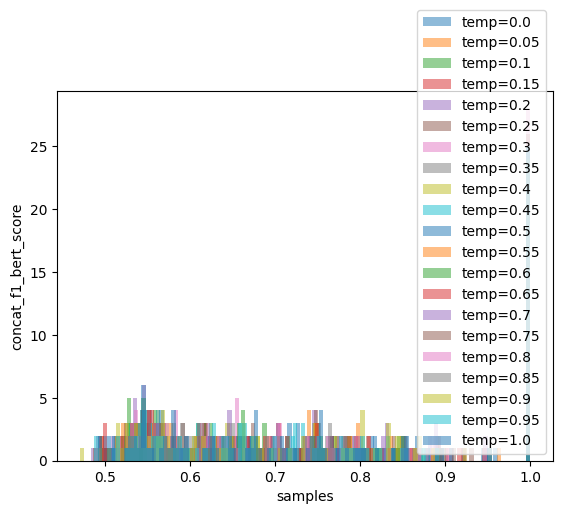



MEAN:
temp=0.0: 48.2456250817126
temp=0.05: 45.04831912644791
temp=0.1: 47.078747613660425
temp=0.15: 43.9064201975463
temp=0.2: 45.198763753158886
temp=0.25: 48.70723872540121
temp=0.3: 44.28768069050145
temp=0.35: 49.96634869962496
temp=0.4: 48.88531253728173
temp=0.45: 48.77172874738071
temp=0.5: 47.8089140950566
temp=0.55: 46.36699843557977
temp=0.6: 45.19145229605867
temp=0.65: 46.50572826339615
temp=0.7: 44.69803714063161
temp=0.75: 44.0808485425409
temp=0.8: 49.573389863847574
temp=0.85: 45.09722751779809
temp=0.9: 44.08959268308725
temp=0.95: 45.25246964772813
temp=1.0: 45.04675958422738


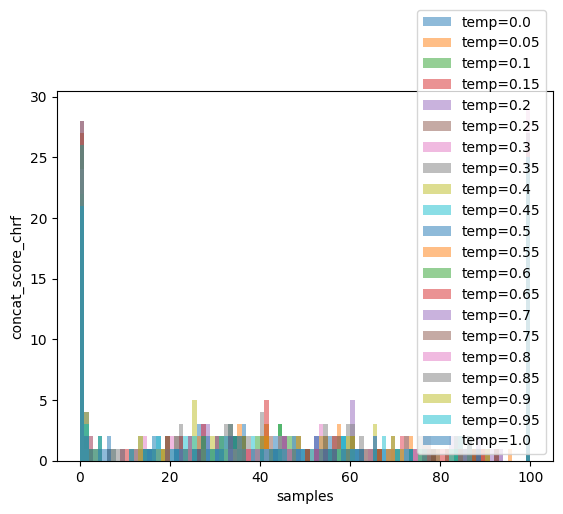



MEAN:
temp=0.0: 0.010101010101010102
temp=0.05: 0.010101010101010102
temp=0.1: 0.010101010101010102
temp=0.15: 0.010101010101010102
temp=0.2: 0.010101010101010102
temp=0.25: 0.020202020202020204
temp=0.3: 0.020202020202020204
temp=0.35: 0.010101010101010102
temp=0.4: 0.0
temp=0.45: 0.020202020202020204
temp=0.5: 0.010101010101010102
temp=0.55: 0.020202020202020204
temp=0.6: 0.020202020202020204
temp=0.65: 0.010101010101010102
temp=0.7: 0.010101010101010102
temp=0.75: 0.010101010101010102
temp=0.8: 0.010101010101010102
temp=0.85: 0.010101010101010102
temp=0.9: 0.010101010101010102
temp=0.95: 0.010101010101010102
temp=1.0: 0.0


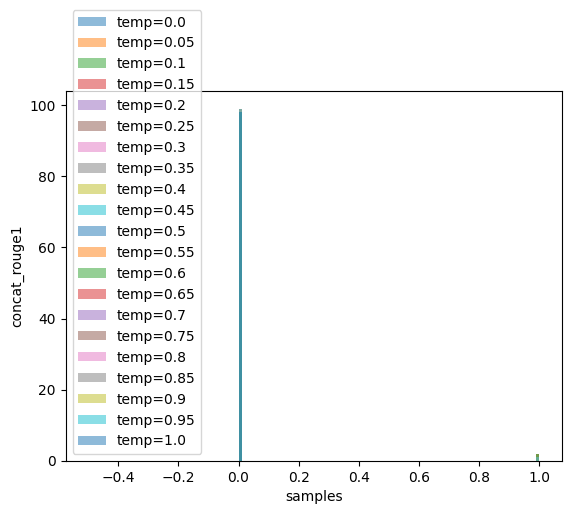



MEAN:
temp=0.0: 0.0
temp=0.05: 0.0
temp=0.1: 0.0
temp=0.15: 0.0
temp=0.2: 0.0
temp=0.25: 0.0
temp=0.3: 0.0
temp=0.35: 0.0
temp=0.4: 0.0
temp=0.45: 0.0
temp=0.5: 0.0
temp=0.55: 0.0
temp=0.6: 0.0
temp=0.65: 0.0
temp=0.7: 0.0
temp=0.75: 0.0
temp=0.8: 0.0
temp=0.85: 0.0
temp=0.9: 0.0
temp=0.95: 0.0
temp=1.0: 0.0


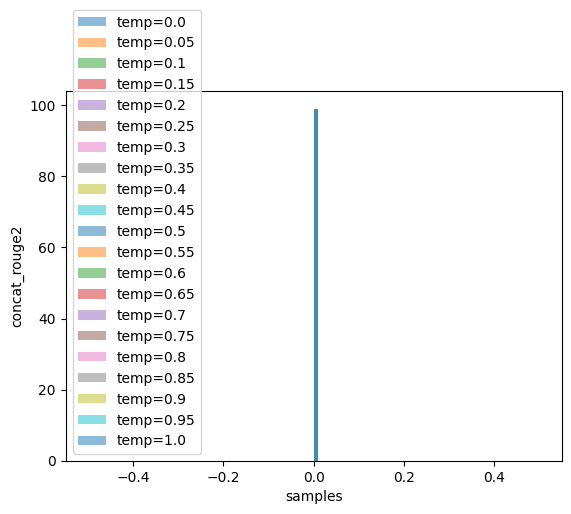



MEAN:
temp=0.0: 0.010101010101010102
temp=0.05: 0.010101010101010102
temp=0.1: 0.010101010101010102
temp=0.15: 0.010101010101010102
temp=0.2: 0.010101010101010102
temp=0.25: 0.020202020202020204
temp=0.3: 0.020202020202020204
temp=0.35: 0.010101010101010102
temp=0.4: 0.0
temp=0.45: 0.020202020202020204
temp=0.5: 0.010101010101010102
temp=0.55: 0.020202020202020204
temp=0.6: 0.020202020202020204
temp=0.65: 0.010101010101010102
temp=0.7: 0.010101010101010102
temp=0.75: 0.010101010101010102
temp=0.8: 0.010101010101010102
temp=0.85: 0.010101010101010102
temp=0.9: 0.010101010101010102
temp=0.95: 0.010101010101010102
temp=1.0: 0.0


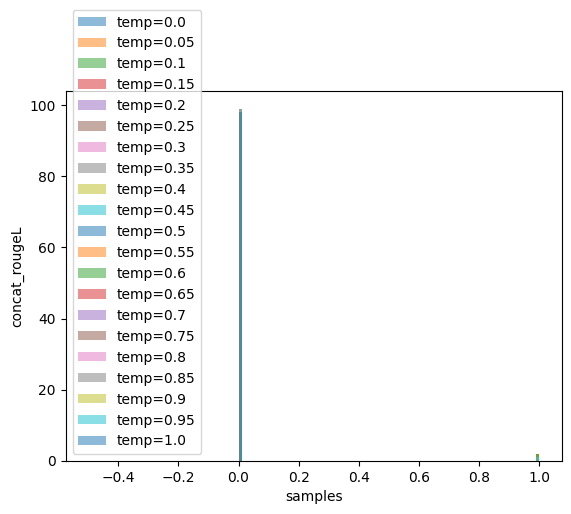



MEAN:
temp=0.0: 0.010101010101010102
temp=0.05: 0.010101010101010102
temp=0.1: 0.010101010101010102
temp=0.15: 0.010101010101010102
temp=0.2: 0.010101010101010102
temp=0.25: 0.020202020202020204
temp=0.3: 0.020202020202020204
temp=0.35: 0.010101010101010102
temp=0.4: 0.0
temp=0.45: 0.020202020202020204
temp=0.5: 0.010101010101010102
temp=0.55: 0.020202020202020204
temp=0.6: 0.020202020202020204
temp=0.65: 0.010101010101010102
temp=0.7: 0.010101010101010102
temp=0.75: 0.010101010101010102
temp=0.8: 0.010101010101010102
temp=0.85: 0.010101010101010102
temp=0.9: 0.010101010101010102
temp=0.95: 0.010101010101010102
temp=1.0: 0.0


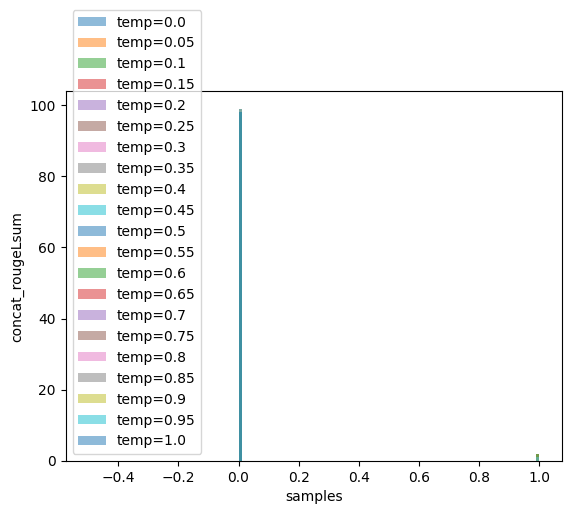



MEAN:
temp=0.0: 0.09671534808551777
temp=0.05: 0.09629211072389764
temp=0.1: 0.09146625032743408
temp=0.15: 0.0821461516484385
temp=0.2: 0.09644955202133523
temp=0.25: 0.09555302373611833
temp=0.3: 0.08042201443425256
temp=0.35: 0.10423561247958157
temp=0.4: 0.09559548149751942
temp=0.45: 0.08524901830262772
temp=0.5: 0.08234186527654108
temp=0.55: 0.08054381918722225
temp=0.6: 0.07961646506069844
temp=0.65: 0.07772813435067327
temp=0.7: 0.0811342026851382
temp=0.75: 0.08055506479194234
temp=0.8: 0.08428901141637361
temp=0.85: 0.06156103141563452
temp=0.9: 0.07412790262429217
temp=0.95: 0.06024126854753455
temp=1.0: 0.07223922221368353


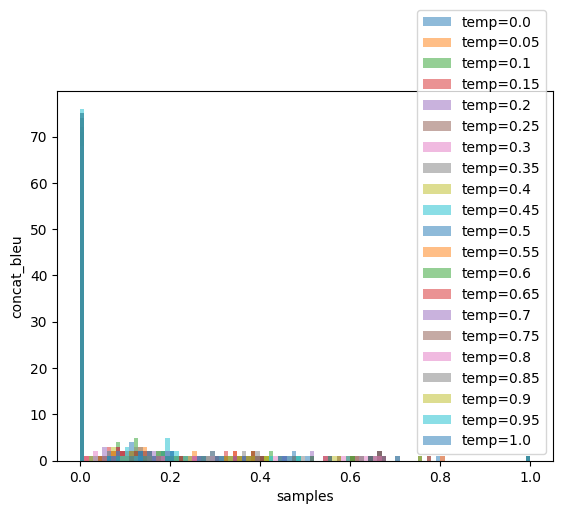



MEAN:
temp=0.0: 0.8154889291281578
temp=0.05: 0.8006895877099994
temp=0.1: 0.8221627638014899
temp=0.15: 0.7940734970902412
temp=0.2: 0.8013493389291594
temp=0.25: 0.8369409300531306
temp=0.3: 0.8202479030496772
temp=0.35: 0.8369187515448138
temp=0.4: 0.8063683525999406
temp=0.45: 0.7975121119402487
temp=0.5: 0.8125116680382369
temp=0.55: 0.7723360037762599
temp=0.6: 0.7990716225665632
temp=0.65: 0.7955458241244481
temp=0.7: 0.7961980426818606
temp=0.75: 0.7643513552653156
temp=0.8: 0.798135456213697
temp=0.85: 0.7896324644022565
temp=0.9: 0.7934547428970031
temp=0.95: 0.8314540097193589
temp=1.0: 0.7719135371316316


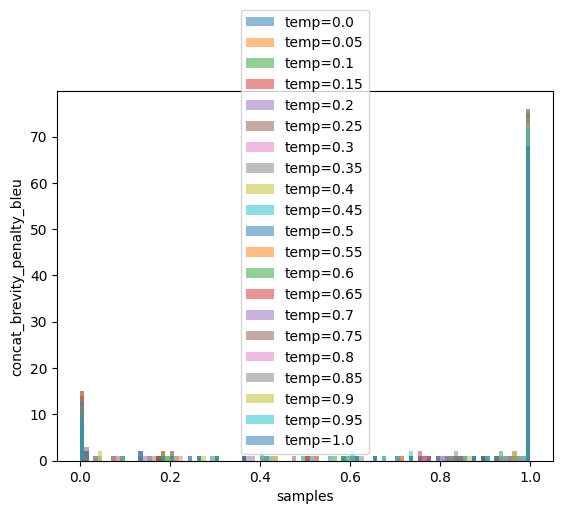

In [29]:
means = [[] for _ in range(len(markups))]

for col in markups[0].columns[-10:]:
    print('\n\nMEAN:')
    for markup_num in range(len(means)):
        means[markup_num].append(markups[markup_num][col].mean())
        print(f'{markup_names[markup_num]}: {means[markup_num][-1]}')

        plt.hist(markups[markup_num][col], bins=100, label=markup_names[markup_num], alpha=0.5)

    plt.xlabel('samples')
    plt.ylabel(col)
    plt.legend()
    plt.show()

# plt.bar(markup_gpt.columns[-10:], gpt_means, label='YaGPT', alpha=0.5)
# plt.bar(markup_gpt.columns[-10:], gpt_lite_means, label='YaGPT-lite', alpha=0.5)
# plt.bar(markup_gpt.columns[-10:], pd.Series(gpt_means) - pd.Series(gpt_lite_means), label='YaGPT - YaGPT-lite', alpha=0.5)

In [16]:
(markups[0]['answers'] == "{'-'}").sum()

41